In [2]:
!pip install --upgrade pip setuptools wheel
!pip install PyYAML==6.0.1

!pip install tf-models-official

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 19.4 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)


ERROR: To modify pip, please run the following command:
C:\Users\frank\.conda\envs\py311\python.exe -m pip install --upgrade pip setuptools wheel


  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
  Using cached tf_models_official-2.19.1-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached google_api_python_client-2.187.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached kaggle-1.8.2-py3-none-any.whl.metadata (16 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata (904 bytes)
  Using cached tensorflow_datasets-4.9.9-py3-none-any.whl.metadata (11 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached cython-3.2.2-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached p

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [67 lines of output]
      C:\Users\frank\AppData\Local\Temp\pip-build-env-eb7dr0am\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: MIT License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************************************************
      
      !!
        self._finalize_license_expression()
      running egg_info
      writing lib3\PyYAML.egg-info\PKG-INFO
      writing dependency_links to lib3\PyYAML.egg-info\de

In [ ]:
import os
import shutil
os.environ["TF_USE_LEGACY_KERAS"] = "1"
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt


c:\Users\frank\.conda\envs\py311\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


ModuleNotFoundError: No module named 'tensorflow_text'

In [ ]:
import pandas as pd

reviews = pd.read_csv("imdbReviews.csv")

In [ ]:
reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [ ]:
reviews.shape

(2000, 4)

In [ ]:
reviews['Sentiment'].value_counts()

,count
Sentiment,
POS,1000
NEG,1000


In [ ]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[1 1 1 1 1 1 1 1 1 1]
0    POS
1    POS
2    POS
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    POS
Name: Sentiment, dtype: object


In [ ]:
reviews1 = list(zip(reviews['Text'], label))

reviews1 = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviews1

,Review,Sentiment
0,Girlfight follows a project dwelling New York ...,1
1,Hollywood North is an euphemism from the movie...,1
2,That '70s Show is definitely the funniest show...,1
3,"9/10- 30 minutes of pure holiday terror. Okay,...",1
4,"A series of random, seemingly insignificant th...",1
...,...,...
1995,Tourists head to Ireland for a school trip to ...,0
1996,Two films are useful for scaring people to God...,0
1997,Ulises is a literature teacher that arrives to...,0
1998,"Um... Okay, I guess I get the whole shaky-cam,...",0


In [ ]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)


In [ ]:
reviews1.head()

,Review,Sentiment
0,"This was a superb episode, one of the best of ...",1
1,METAMORPHOSIS I am working my way through the ...,0
2,-SPOILES- Lame south of the border adventure m...,0
3,"Actually had to stop it. Don't get me wrong, l...",0
4,the intention the directors has for this films...,0


In [ ]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews1['Review'], reviews1['Sentiment'],
                                                     stratify=reviews1['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))



In [ ]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))


In [ ]:
X_train

,Review
820,I was browsing through Netflix and stumbled up...
1726,"If you want to see intelligent, philosophical ..."
1361,Friz Freleng's 'Speedy Gonzalez' was the secon...
1760,"First off, this movie was a wild ride the whol..."
771,"For the first couple of seasons, I thought The..."
...,...
340,I watched this movie in the wee hours of the m...
728,This hodge-podge adapted from a Gore Vidal nov...
774,I give this film it's props that it is very we...
795,That's what I found myself saying time after t...


In [ ]:
X_val

,Review
299,This final Voyager episode begins 23 years in ...
1750,This documentary explores a story covered in P...
1917,"A terrible amateur movie director (no, not Tod..."
1176,"This is a great example of a good, dumb movie...."
933,I'm not sure under what circumstances director...
...,...
1504,One wonders why this picture was made at all :...
514,"If this is someone's favorite movie, they need..."
116,108: Tarzan and His Mate (1934) - released 4/2...
1040,"Don't even bother with this movie, it's bad wh..."


In [ ]:
X_test

,Review
450,A famous conductor decides after a heart attac...
1018,I'd heard about this movie a while ago from a ...
1521,Plan B is strictly by-the-numbers fare except ...
1377,This could have been a rather entertaining fil...
1308,I had initially heard of TEARS OF KALI a while...
...,...
915,"On one level, this film can bring out the chil..."
1137,Although Kris Kristofferson is good in this ro...
72,"The good news is a movie was made, drawing on ..."
712,I dunno sometimes...you try and try and try to...


In [ ]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
reviews1['Review'][0]

"This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was 

In [ ]:
text_test = ["This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was a superb episode, one of the best of both seasons."]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  2023  2001  1037 21688  2792  1010  2028  1997  1996  2190  1997]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.69012964  0.9975627  -0.3208748   0.03474551  0.61504745 -0.9180394
  0.9794196  -0.8541881  -0.5535999  -0.99389905 -0.142773   -0.95245665]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.01881647 -0.19083829  0.30505913 ... -0.81572384 -0.21436551
   0.4443285 ]
 [-0.51914114  0.05107715 -0.33874938 ...  1.2194273  -0.7392855
   0.8853786 ]
 [-0.45957813  0.15729143 -0.8944279  ...  0.89337885 -0.33719856
   0.5819469 ]
 ...
 [-0.5031907   0.2323427  -2.4240851  ... -1.054815    0.7751127
  -0.36098683]
 [-1.461417    0.20342326 -0.84854496 ... -0.0916709  -0.07505861
  -0.0123887 ]
 [-1.6349417   0.3367449  -1.0467948  ...  0.22726564 -0.9382055
  -0.24242367]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
 classifier_model = build_classifier_model()

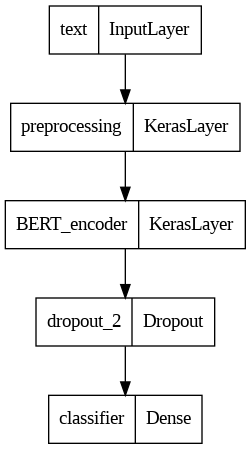

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
epochs = 6
steps_per_epoch = 1200  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

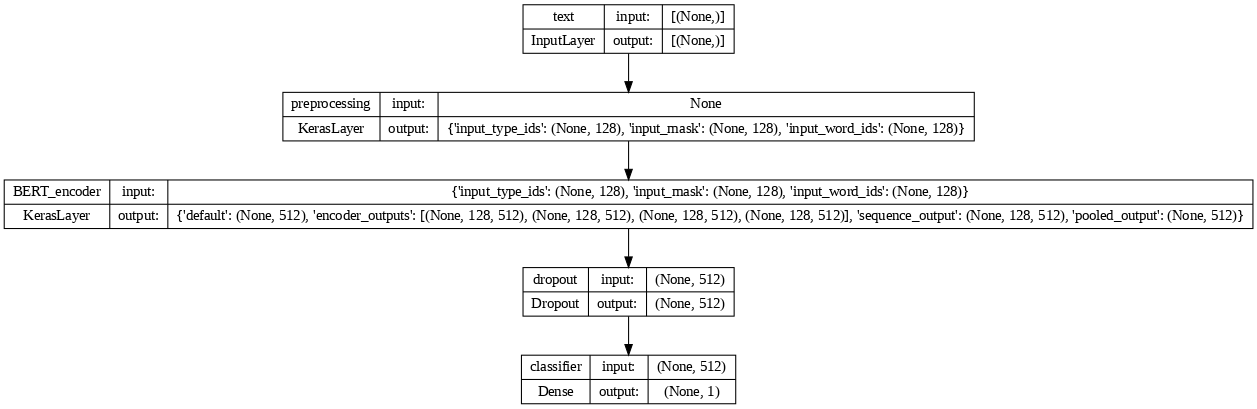

In [ ]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/6
38/38 [==============================] - 252s 7s/step - loss: 0.7170 - binary_accuracy: 0.5150 - val_loss: 0.6807 - val_binary_accuracy: 0.5375
Epoch 2/6
38/38 [==============================] - 246s 7s/step - loss: 0.6720 - binary_accuracy: 0.5650 - val_loss: 0.6458 - val_binary_accuracy: 0.5675
Epoch 3/6
38/38 [==============================] - 241s 6s/step - loss: 0.6282 - binary_accuracy: 0.5925 - val_loss: 0.6265 - val_binary_accuracy: 0.6950
Epoch 4/6
38/38 [==============================] - 245s 6s/step - loss: 0.5876 - binary_accuracy: 0.6625 - val_loss: 0.5537 - val_binary_accuracy: 0.7075
Epoch 5/6
38/38 [==============================] - 251s 7s/step - loss: 0.5236 - binary_accuracy: 0.7192 - val_loss: 0.5644 - val_binary_accuracy: 0.6225
Epoch 6/6
38/38 [==============================] - 242s 6s/step - loss: 0.4595 - binary_accuracy: 0.7600 - val_loss: 0.4611 - val_binary_a

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


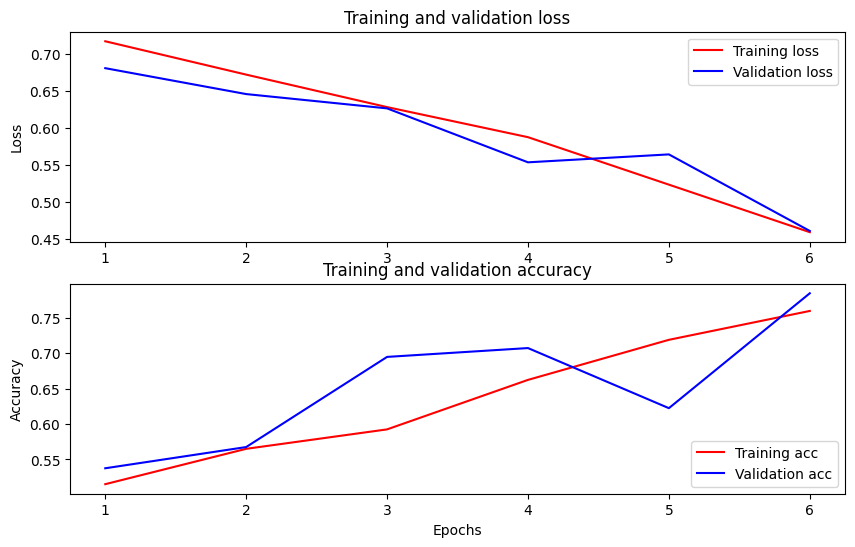

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

13/13 [==============================] - 20s 2s/step - loss: 0.4749 - binary_accuracy: 0.7675
Loss: 0.47488856315612793
Accuracy: 0.7674999833106995


In [ ]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predicted values using the model
y_pred=classifier_model.predict(X_test)

print(y_pred.flatten())

13/13 [==============================] - 24s 2s/step
[ 2.90781856e+00 -8.60426784e-01 -6.17068768e-01 -2.10889190e-01
  7.40864754e-01 -2.10863262e-01 -2.13571215e+00 -6.56205416e-01
 -5.40910959e-01 -1.10880315e+00  2.54697227e+00 -7.21308827e-01
  1.91099179e+00  3.25131506e-01  2.77762860e-01 -2.76807117e+00
  6.56558037e-01  2.65197706e+00 -1.50766015e+00 -1.76613414e+00
  2.60213166e-01 -1.91866010e-01 -1.75825560e+00 -5.76953627e-02
 -1.19207370e+00 -2.80017591e+00  1.30906260e+00  8.37854862e-01
  1.74574018e+00  1.66048849e+00  4.79724765e-01 -1.27481818e-01
  1.98966146e+00  2.33586580e-01 -1.09291637e+00  3.00326848e+00
  2.90128160e+00  8.12181160e-02 -1.41055512e+00 -1.30677438e+00
  1.36458433e+00  1.85418332e+00 -6.84063673e-01  1.11499155e+00
 -1.85771573e+00 -9.33078468e-01 -7.79849470e-01 -1.13122535e+00
 -1.40432692e+00  5.03032148e-01 -1.96637452e+00  2.14559793e+00
  2.15868211e+00  1.47376865e-01  8.38792682e-01 -1.36158586e+00
  1.56932436e-02  2.64870477e+00  1.1

In [ ]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[164  36]
 [ 57 143]] 

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       200
           1       0.80      0.71      0.75       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

Accuracy: 0.7675
AUC: 0.7675
